In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
business = pd.read_json('business.json', lines=True)

In [3]:
business.shape

(192609, 14)

In [4]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 14 columns):
address         192609 non-null object
attributes      163773 non-null object
business_id     192609 non-null object
categories      192127 non-null object
city            192609 non-null object
hours           147779 non-null object
is_open         192609 non-null int64
latitude        192609 non-null float64
longitude       192609 non-null float64
name            192609 non-null object
postal_code     192609 non-null object
review_count    192609 non-null int64
stars           192609 non-null float64
state           192609 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 20.6+ MB


In [6]:
business = business.drop(['attributes', 'hours', 'latitude', 'longitude'], axis=1)

In [7]:
business.head()

,address,business_id,categories,city,is_open,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,0,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,1,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,1,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,1,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,1,Queen City Plumbing,28217,4,4.0,NC


In [8]:
print(business.categories[0])

Golf, Active Life


In [9]:
type(business.categories[0])

str

In [10]:
business.categories[0][0]

'G'

In [11]:
business['categories'] = business.categories.str.split().tolist()

In [12]:
business['categories'].head()

0                                [Golf,, Active, Life]
1    [Specialty, Food,, Restaurants,, Dim, Sum,, Im...
2               [Sushi, Bars,, Restaurants,, Japanese]
3                    [Insurance,, Financial, Services]
4    [Plumbing,, Shopping,, Local, Services,, Home,...
Name: categories, dtype: object

In [13]:
category_counts = business['categories'].value_counts().head(20)

In [14]:
print(category_counts)

[Restaurants,, Pizza]                               1042
[Nail, Salons,, Beauty, &, Spas]                    1031
[Pizza,, Restaurants]                                993
[Beauty, &, Spas,, Nail, Salons]                     947
[Food,, Coffee, &, Tea]                              888
[Mexican,, Restaurants]                              885
[Coffee, &, Tea,, Food]                              865
[Restaurants,, Mexican]                              853
[Chinese,, Restaurants]                              840
[Hair, Salons,, Beauty, &, Spas]                     831
[Beauty, &, Spas,, Hair, Salons]                     819
[Restaurants,, Chinese]                              789
[Automotive,, Auto, Repair]                          585
[Auto, Repair,, Automotive]                          534
[Food,, Grocery]                                     492
[Grocery,, Food]                                     491
[Restaurants,, Italian]                              474
[Italian,, Restaurants]        

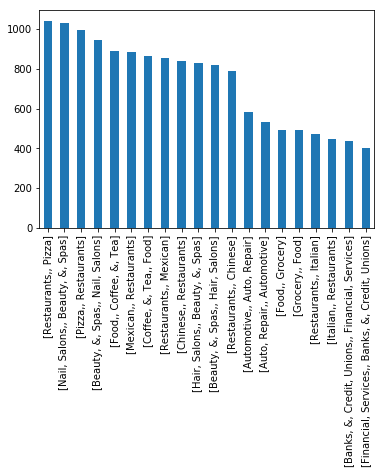

In [15]:
category_counts.plot(kind='bar')

In [16]:
pd.isna(business['categories']).sum()

482

In [17]:
business.loc[pd.isna(business['categories'])].head()

,address,business_id,categories,city,is_open,name,postal_code,review_count,stars,state
265,6340 E Thomas Rd,xOR85RicYj642O3_iJ7hgg,None,Scottsdale,1,Phoenix Valuations,85251,3,3.5,AZ
597,203 East Lake Road NE,tWvep1usNNI3NYkoRbSb7g,None,Airdrie,1,Airdrie East Side Storage,T4A 2E9,3,1.0,AB
1020,995 Greentree Rd,llG2YxnevtFhW7LVa4QJXQ,None,Pittsburgh,1,Highfield Open Mri,15220,5,2.0,PA
1332,"1816 W Pointe Dr, Ste C",zi2CV7isWyGRxVXJxdDQXg,None,Charlotte,1,Ceva Freight,28214,3,1.5,NC
1770,5070 Dundas Street W,oyPZZX2fQYpSBHk25tL26A,None,Etobicoke,1,Joe's Pastizzi Plus,M9A 1B9,6,4.5,ON


In [18]:
business = business.loc[~pd.isna(business['categories'])]

In [19]:
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [20]:
business.shape

(18004, 10)

In [21]:
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [22]:
restaurant_category_counts.head()

Restaurants    18004
Food,           5473
&               3291
Bars,           2720
American        2596
dtype: int64

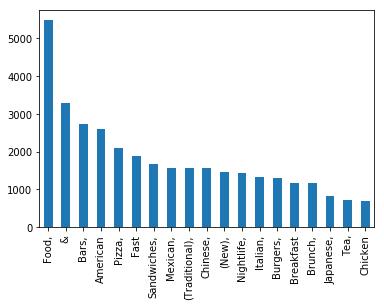

In [23]:
restaurant_category_counts[1:].plot(kind='bar')

In [43]:
italian_pizza = business.loc[business['categories'].apply(lambda x: ('Italian,' or 'Pizza,') in x), :]

In [45]:
italian_pizza.head()

,address,business_id,categories,city,is_open,name,postal_code,review_count,stars,state
35,6401 Morrison Blvd,BvYU3jvGd0TJ7IyZdfiN2Q,"[Sandwiches,, Italian,, American, (Traditional...",Charlotte,0,Manzetti's Tavern,28211,16,3.5,NC
83,619 Mount Pleasant Road,RFbMVekR8lU9tPJ8sWrwHg,"[Italian,, Restaurants]",Toronto,1,Tavolino,M4S 2M5,18,4.0,ON
260,1012 17 Avenue SW,tWjfgVtTD5n01Cq9dFWGsA,"[Italian,, Canadian, (New),, Food,, American, ...",Calgary,1,Cibo,T2T 0A5,185,3.5,AB
445,12585 Sherbrooke Rue E,8ELlbjnXfZAw4KbQRP3-EQ,"[Italian,, Restaurants]",Pointe-Aux-Trembles,1,Tomate Basilic,H1B 1C8,8,4.0,QC
813,942 Penn Ave,sMzNLdhJZGzYirIWt-fMAg,"[Cocktail, Bars,, Italian,, American, (New),, ...",Pittsburgh,1,Sienna Mercato,15222,752,4.0,PA


In [47]:
italian_pizza.shape

(1333, 10)

In [53]:
italian_pizza.to_csv('output.csv', columns=['business_id', 'review_count', 'stars', 'state'])